# Regularización (Ridge - Lasso)

In [ ]:
# Importar librerías y cargar los datos

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [3]:
# Almacenar datos

df.to_csv('../data/raw/df_raw.csv',index=False)

In [4]:
# Exploración

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [5]:
# Factorizar variables categóricas

for column in df.columns:
    if df[column].dtype == 'object':
            df[column] = pd.factorize(df[column])[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


In [6]:
# Definir variable objetivo: Heart disease_prevalence

X = df.drop(columns=['Heart disease_prevalence','Heart disease_Lower 95% CI','Heart disease_Upper 95% CI'])
y = df['Heart disease_prevalence']

In [7]:
# Dividir datos para entrenamiento y pruebas

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
# Estándarizar los datos

scaler = StandardScaler()

X_train_esc = scaler.fit_transform(X_train, y_train)
X_test_esc = scaler.transform(X_test)

X_train_esc = pd.DataFrame(X_train_esc,columns=X_train.columns,index=X_train.index)
X_test_esc = pd.DataFrame(X_test_esc,columns=X_test.columns,index=X_test.index)

In [9]:
# Construir modelo de regresión

model_lr = LinearRegression()
model_lr.fit(X_train_esc,y_train)

print(f'Intercepto : {model_lr.intercept_}')
print(f'Coeficientes : {model_lr.coef_}')

Intercepto : 8.586106687450231
Coeficientes : [-5.31534788e-01  3.75125799e-01 -1.69325804e+00  3.52876791e+05
  1.16783286e-01  2.98634279e+05  5.67992850e-01  5.18497666e+05
  9.93370723e-01  2.86690614e+05  6.80732190e-02  2.23190332e+05
  7.81730944e-02  2.47559620e+05  2.10582984e+00  4.15763657e+05
  7.04713200e-01  3.62336790e+05  9.35644305e-01  2.54334835e+05
  4.29194217e-02  1.32876849e+06  1.94090452e-01  1.17623263e+06
 -5.81532088e-02  6.26753684e+05  5.21866330e-02  2.32915226e+05
 -1.64690734e-02  8.61579922e+04  5.28233539e-02  1.22658457e+05
  6.38367749e-01  4.78385578e-02  2.39604781e-03 -1.60078335e-01
  1.90460632e-01  3.23103865e-01  1.13361586e-01  4.69601885e-01
 -4.50160471e-01 -1.01139830e-01 -4.45587520e-01 -2.31541756e-01
 -7.41232285e-01  3.99397574e-01  5.03119610e-01  3.35371228e-01
  6.60532551e-01 -3.41364174e-01  1.28485896e-01 -4.85297784e-02
 -1.00385718e-02  3.69352776e-02 -7.77203559e-02 -5.07552268e-02
 -1.02682185e-01  7.14853129e-02  4.10231177

In [10]:
# Generar predicción (ejecución del modelo data entrenamiento)

y_pred_train_lr = model_lr.predict(X_train_esc)

print(f'RMSE : {root_mean_squared_error(y_train,y_pred_train_lr)}')
print(f'R2 :{r2_score(y_train,y_pred_train_lr)}')

RMSE : 0.21767138871970504
R2 :0.9844940091787406


In [11]:
# Generar predicción (ejecución del modelo data pruebas)

y_pred_lr = model_lr.predict(X_test_esc)
from sklearn.metrics import root_mean_squared_error, r2_score

print(f'RMSE : {root_mean_squared_error(y_test,y_pred_lr)}')
print(f'R2 :{r2_score(y_test,y_pred_lr)}')

RMSE : 0.23251911149615317
R2 :0.9832419180657832


In [12]:
# Modelo LASSO

model_lasso = Lasso(alpha=0.1,max_iter=1000000)

model_lasso.fit(X_train_esc,y_train)
y_pred = model_lasso.predict(X_test_esc)

print(f'RMSE : {root_mean_squared_error(y_test,y_pred)}')
print(f'R2 :{r2_score(y_test,y_pred)}')

RMSE : 0.3464645580802435
R2 :0.962793002143672


In [13]:
print(f'Coenficientes Lasso: {model_lasso.coef_}')

Coenficientes Lasso: [ 0.         -0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.         -0.          0.08584374
 -0.          0.06628764 -0.          0.         -0.         -0.05367902
 -0.          0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.11607901
  0.          0.          0.          0.         -0.          0.
  0.          0.13801932 -0.          0.     

In [15]:
# Identificar las variables relevantes para el modelo

resultados = {X_train.columns[i]:model_lasso.coef_[i] for i in range(len(X_train.columns)) if model_lasso.coef_[i]>0.05}
resultados

{'70-79 y/o % of total pop': np.float64(0.08584374147019415),
 '80+ y/o % of total pop': np.float64(0.06628763799911085),
 'Percent of Population Aged 60+': np.float64(0.11607901116035071),
 'anycondition_Upper 95% CI': np.float64(0.1380193216407255),
 'COPD_Upper 95% CI': np.float64(0.7167881896157354),
 'CKD_Upper 95% CI': np.float64(0.720309185125694)}

In [16]:
# Análisis modificando hiperparámetros del modelo

alphas = np.linspace(0,20,20)
alphas

array([ 0.        ,  1.05263158,  2.10526316,  3.15789474,  4.21052632,
        5.26315789,  6.31578947,  7.36842105,  8.42105263,  9.47368421,
       10.52631579, 11.57894737, 12.63157895, 13.68421053, 14.73684211,
       15.78947368, 16.84210526, 17.89473684, 18.94736842, 20.        ])

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1363: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.310e+01, tolerance: 7.676e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_co

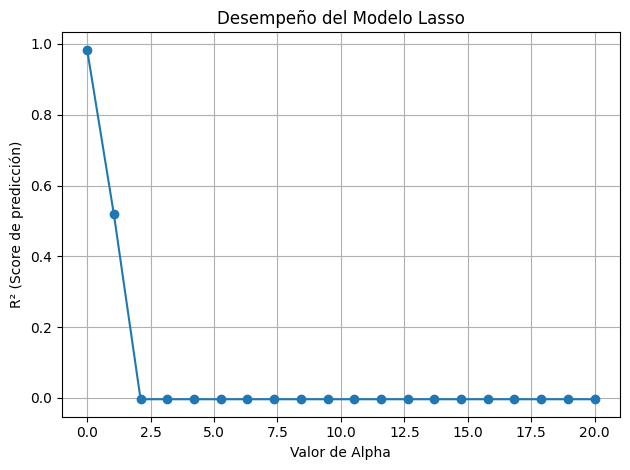

In [20]:
# Gráfico para interpretar los resultados

R2 = []
for a in alphas:
    model = Lasso(alpha=a,max_iter=1000)
    model.fit(X_train_esc,y_train)
    y_pred = model.predict(X_test_esc)
    R2.append(r2_score(y_test,y_pred))

plt.plot(alphas, R2, marker='o', linestyle='-')
plt.xlabel("Valor de Alpha")  # Etiqueta del eje X
plt.ylabel("R² (Score de predicción)")  # Etiqueta del eje Y
plt.title("Desempeño del Modelo Lasso")  # Título del gráfico

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Identificar el valor óptimo de alpha

from sklearn.linear_model import LassoCV

modelo_cv = LassoCV(alphas=[0.1, 0.5, 1, 5, 10, 20], cv=5, max_iter=1000000)
modelo_cv.fit(X_train_esc, y_train)

print(f"Mejor alpha según CV: {modelo_cv.alpha_}")


Mejor alpha según CV: 0.1


CONCLUSIONES:

El parámetro alpha permite modificar la penalización que hace el modelo. Luego de hacer el ejercicio de probar con diferentes valores desde 0.0 hasta 20, se puede interpretar que:

- Si el valor de alpha es 0.0, quiere decir que no hay regularización y por lo tanto todos los coeficientes se mantienen. Sería igual a un modelo de regresión lineal normal.
- Cuando el valor de alpha es mayor a 0.0 pero bajo como por ejemplo: 0.1 se evidencia que algunos coeficientes se reducen y el modelo descarta las variables que no aportan, es el escenario más eficiente
- Finalmente, cuando el alpha es muy alto (por ejemplo 20) el modelo pierde capacidad predictiva porque la penalización es muy fuerte y hace que los coeficientes vayan a cero y no se logren identificar las variables relevantes